### 1.0 — IMPORTING LIBRARIES
signed by Emir Yarkın Yaman a.k.a. WEINOOSE

In [1]:
import pandas as pd
import datetime
from sklearn import preprocessing

### 2.0 — FEATURE ENGINEERING

##### 2.0.1 — data location for forecast data.

In [2]:
forecast = pd.DataFrame(pd.read_csv('Izmir Hava Durumu 2018-08.31.2023.csv'))
totalentry_forecast = len(list(forecast[list(forecast.columns)[0]]))

##### 2.0.2 — deleting %30> NaN filled columns at weather forecast, replacing rest of to NaN values to zero.

In [3]:
temp0 = pd.DataFrame(forecast.isna().sum())
temp0.rename(columns={0: 'ixx'}, inplace=True)
temp0 = temp0.query(f'ixx >= {totalentry_forecast*0.3}')
forecast = forecast.drop(columns=temp0.index.to_list(), axis=1).fillna(0)

##### 2.0.3 — copying dataset for seperate time intervals.

In [4]:
forecast00 = forecast.copy(deep=True)
forecast01 = forecast.copy(deep=True)
forecast02 = forecast.copy(deep=True)
forecast03 = forecast.copy(deep=True)
forecast04 = forecast.copy(deep=True)
forecast05 = forecast.copy(deep=True)
forecast06 = forecast.copy(deep=True)
forecast07 = forecast.copy(deep=True)
forecast08 = forecast.copy(deep=True)
forecast09 = forecast.copy(deep=True)
forecast10 = forecast.copy(deep=True)
forecast11 = forecast.copy(deep=True)
forecast12 = forecast.copy(deep=True)
forecast13 = forecast.copy(deep=True)
forecast14 = forecast.copy(deep=True)
forecast15 = forecast.copy(deep=True)
forecast16 = forecast.copy(deep=True)
forecast17 = forecast.copy(deep=True)
forecast18 = forecast.copy(deep=True)
forecast19 = forecast.copy(deep=True)
forecast20 = forecast.copy(deep=True)
forecast21 = forecast.copy(deep=True)
forecast22 = forecast.copy(deep=True)
forecast23 = forecast.copy(deep=True)

##### 2.0.4 — adding timeseries weight for weather forecast by 24-hour basis for one day.

In [5]:
hours_of_days, templist = [], forecast['date'].to_list()
for i in range(0,24):
    hours_of_days.append([])

for i in templist:
    var_date = i
    for q in range(0,24):
        if q < 10:
            var_date_new = f'{var_date} 0{q}:00:00'
        else:
            var_date_new = f'{var_date} {q}:00:00'
        hours_of_days[q].append(var_date_new)

forecast00['date'] = hours_of_days[0]
forecast01['date'] = hours_of_days[1]
forecast02['date'] = hours_of_days[2]
forecast03['date'] = hours_of_days[3]
forecast04['date'] = hours_of_days[4]
forecast05['date'] = hours_of_days[5]
forecast06['date'] = hours_of_days[6]
forecast07['date'] = hours_of_days[7]
forecast08['date'] = hours_of_days[8]
forecast09['date'] = hours_of_days[9]
forecast10['date'] = hours_of_days[10]
forecast11['date'] = hours_of_days[11]
forecast12['date'] = hours_of_days[12]
forecast13['date'] = hours_of_days[13]
forecast14['date'] = hours_of_days[14]
forecast15['date'] = hours_of_days[15]
forecast16['date'] = hours_of_days[16]
forecast17['date'] = hours_of_days[17]
forecast18['date'] = hours_of_days[18]
forecast19['date'] = hours_of_days[19]
forecast20['date'] = hours_of_days[20]
forecast21['date'] = hours_of_days[21]
forecast22['date'] = hours_of_days[22]
forecast23['date'] = hours_of_days[23]

forecast_data = pd.concat([forecast00,forecast01,forecast02,forecast03,forecast04,forecast05,
                           forecast06,forecast07,forecast08,forecast09,forecast10,forecast11,
                           forecast12,forecast13,forecast14,forecast15,forecast16,forecast17,
                           forecast18,forecast19,forecast20,forecast21,forecast22,forecast23], ignore_index=True, axis=0)

forecast_data.rename(columns={'date': 'Tarih'}, inplace=True)

forecast_data = forecast_data.sort_values('Tarih', ascending=True)
forecast_data = forecast_data.reset_index()
forecast_data = forecast_data.drop(columns=['index'], axis=1)

##### 2.1.0 — merging datasets.

In [6]:
train_data = pd.DataFrame(pd.read_csv('train.csv'))
test_dates = pd.DataFrame(pd.read_csv('sample_submission.csv'))
august = forecast_data.drop(labels=range(0, 40152), axis=0)

data = pd.concat([train_data.merge(forecast_data, on='Tarih', how='inner'), 
                  test_dates.merge(august, on='Tarih', how='inner')], 
                  ignore_index=True, axis=0)

##### 2.2.0 — identifying power outages with the help of 'med.csv'

In [7]:
outage, new_med_data = [], []
med_data = pd.DataFrame(pd.read_csv('med.csv'))['Tarih'].to_list()

for var_date in med_data:
    var_date = str(var_date.replace('.','-')).split('-')
    if int(var_date[0]) < 10:
        var_date = f'{var_date[2]}-{var_date[1]}-0{var_date[0]}'
    else:
        var_date = f'{var_date[2]}-{var_date[1]}-{var_date[0]}'
    for hour in range(0,24):
        if hour < 10:
            var = f'{var_date} 0{hour}:00:00'
        else:
            var = f'{var_date} {hour}:00:00'
        new_med_data.append(var)
new_med_data.sort()

##### 2.2.1 — creating a binary column about power outage, and adding them to both test and train datas.

In [8]:
for i in data['Tarih'].to_list():
    if i in new_med_data:
        outage.append(1)
    else:
        outage.append(0)

data['Power Outage (MED)'] = outage

##### 2.3.0 — now adding extra weights like; weekin, weekend. / day of the year. / week of the year. / morning, afternoon, evening, night... also 01.01.2018 is monday so we are good!

In [9]:
dates = preprocessing.LabelEncoder().fit_transform(data['Tarih'])
hours = []

day_status = []
weekends = []
day_of_the_year = []
week_of_the_year = []

for i in data['Tarih'].to_list():
    hours.append(int(i[11:13]))

for hour in hours:
    if 10 >= hour >= 6:
        day_status.append('sabah')
    elif 16 >= hour >= 11:
        day_status.append('öğlen')
    elif 21 >= hour >= 17:
        day_status.append('akşam')
    else:
        day_status.append('gece')

for day in dates:
    # weekend finder.
    the_date = datetime.date(2018, 1, 1) + datetime.timedelta(days=int(day))
    day_of_the_week = the_date.weekday()
    if day_of_the_week == 5 or day_of_the_week == 6:
        weekends.append(1)
    else:
        weekends.append(0)

for day in dates:
    # day of the year finder.
    the_date = datetime.date(2018, 1, 1) + datetime.timedelta(days=int(day))
    day_of_the_year.append(the_date.timetuple().tm_yday)

for day in dates:
    # week of the year finder.
    the_date = datetime.date(2018, 1, 1) + datetime.timedelta(days=int(day))
    week_of_the_year.append(the_date.isocalendar()[1])

# label encoding the day status to convert string values to numerical features.
day_status = preprocessing.LabelEncoder().fit_transform(day_status)

# let's convert date column into seperate columns.
day, month, year, hourrr = [], [], [], []
for i in data['Tarih'].to_list():
    year.append(int(i[0:4]))
    month.append(int(i[5:7]))
    day.append(int(i[8:10]))
    hourrr.append(int(i[11:13]))
data = data.drop(columns=['Tarih'],axis=1)

# finalizing the assignments.
data['Günün Vakti'] = day_status
data['Yılın Günü'] = day_of_the_year
data['Yılın Haftası'] = week_of_the_year
data['Haftasonu'] = weekends
data['Yıl'] = year
data['Ay'] = month
data['Gün'] = day
data['Saat'] = hour

In [10]:
# print(data)

### 3.0 — TRAIN & TEST SPLIT

In [11]:
from sklearn.model_selection import train_test_split
submission = data.drop(labels=range(0, 40152), axis=0)

data = data.drop(labels=range(40152, 40896), axis=0)
y = data['Dağıtılan Enerji (MWh)'].values

data = data.drop(columns=['Dağıtılan Enerji (MWh)'], axis = 1)
x = data.values

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=17)

### 4.0 — FEATURE PRE-PROCESSING / NORMALIZATION

In [12]:
normalize_on_off = 'off'
if normalize_on_off == 'on':
    x_train = preprocessing.normalize(x_train)
    x_test = preprocessing.normalize(x_test)

### 5.0 — REGULARIZATION / GATHERING TRAIN RESULTS

In [13]:
import matplotlib.pyplot as plt
import numpy as np

from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_percentage_error, r2_score

xgb_optimization_results = {}

def xgb_optimization(start,stop,step):
    
    test_accuracy_list = []
    test_mape_list = []
    c_list = []

    for c in np.arange(start,stop,step):
        
        model0 = XGBRegressor(
            n_estimators=250,eta=c,eval_metric='mape',objective='reg:squarederror',
            reg_alpha=57.0,reg_lambda=0.9,gamma=4.2,max_depth=17)
        
        model0.fit(x_train,y_train) 
        y_pred = model0.predict(x_test)

        test_accuracy_list.append(r2_score(y_test,y_pred))
        test_mape_list.append(mean_absolute_percentage_error(y_test,y_pred))
        
        c_list.append(c)

    xgb_optimization_results['XGB Regressor'] = [c_list[test_accuracy_list.index(max(test_accuracy_list))],max(test_accuracy_list)]

    plt.figure(figsize=(16,10),dpi=80)
    plt.grid()
    plt.title(f'XGB Regressor\nBest Learning Rate: {c_list[test_accuracy_list.index(max(test_accuracy_list))]}\nMaximum R2: {max(test_accuracy_list)}\nMinimum MAPE: {test_mape_list[test_accuracy_list.index(max(test_accuracy_list))]}')
    plt.plot(c_list, test_accuracy_list, label='Test Accuracy',c = 'blue',linestyle='dashdot')
    plt.ylabel('accuracy rate')
    plt.xlabel("regularization parameter")

c:\Users\lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


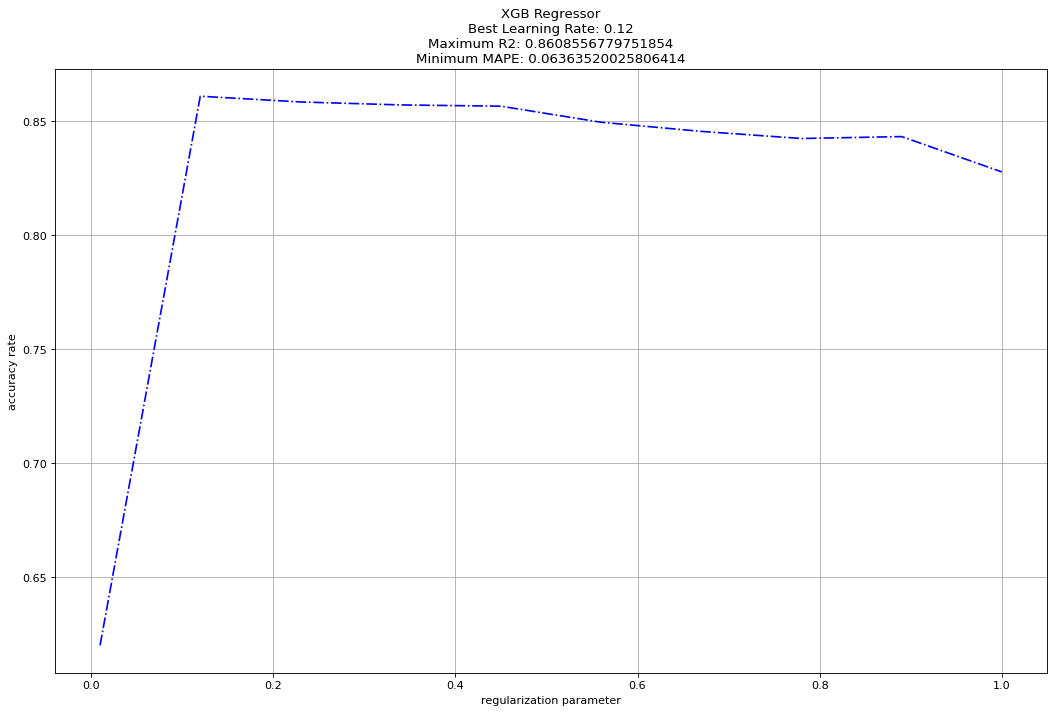

In [14]:
xgb_optimization(0.01,1.01,0.11)

### 6.0 — MODEL EVALUATION

In [15]:
# so as you see above, our feed-backs are good, so let's move forward.
x_train = x
y_train = y

y_test = submission['Dağıtılan Enerji (MWh)'].values
submission = submission.drop(columns=['Dağıtılan Enerji (MWh)'], axis=1)

x_test = submission.values

# normalizing again.
if normalize_on_off == 'on':
    x_train = preprocessing.normalize(x_train)
    x_test = preprocessing.normalize(x_test)

# it is time to finalize things.
model = XGBRegressor(
            n_estimators=250,eta=xgb_optimization_results['XGB Regressor'][0],eval_metric='mape',objective='reg:squarederror',
            reg_alpha=57.0,reg_lambda=0.9,gamma=4.2,max_depth=17)

model.fit(x_train, y_train)
y_predicted = model.predict(x_test)

# let's save it into the submission0.csv
final, sample_submission = pd.DataFrame(), pd.DataFrame(pd.read_csv('sample_submission.csv'))
final['Tarih'] = sample_submission['Tarih']
final['Dağıtılan Enerji (MWh)'] = y_predicted

final.to_csv("submission5.csv",index=None)